In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [2]:
def RemoveOutlier(df,var):
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR
 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 df = df[((df[var] >= low) & (df[var] <= high))]
 return df

In [16]:
def BuildModel(X, Y):
 # Training and testing data
 from sklearn.model_selection import train_test_split
 # Assign test data size 20%
 xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.25, random_state=13)       
 from sklearn.linear_model import LogisticRegression
 model = LogisticRegression(solver = 'lbfgs')
 model = model.fit(xtrain,ytrain)
 ypred = model.predict(xtest)
 from sklearn.metrics import confusion_matrix
 cm = confusion_matrix(ytest, ypred)
 sns.heatmap(cm, annot=True)
 plt.show()
 from sklearn.metrics import classification_report
 print(classification_report(ytest, ypred))

In [17]:
df = pd.read_csv('purchase.csv')

In [18]:
 print('Information of Dataset:\n', df.info)
 print('Shape of Dataset (row x column): ', df.shape)
 print('Columns Name: ', df.columns)
 print('Total elements in dataset:', df.size)
 print('Datatype of attributes (columns):', df.dtypes)
 print('First 5 rows:\n', df.head().T)
 print('Last 5 rows:\n',df.tail().T)
 print('Any 5 rows:\n',df.sample(5).T)

Information of Dataset:
 <bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>
Shape of Dataset (row x column):  (400, 5)
Columns Name:  Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
Total elements in dataset: 2000
Datatype of attributes (columns): User ID             int64
Gender             objec

In [19]:
 df = df.drop('User ID', axis=1)
 df.columns = ['Gender', 'Age', 'Salary', 'Purchased']

In [20]:
df

,Gender,Age,Salary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [21]:
print('Statistical information of Numerical Columns: \n',df.describe())

Statistical information of Numerical Columns: 
               Age         Salary   Purchased
count  400.000000     400.000000  400.000000
mean    37.655000   69742.500000    0.357500
std     10.482877   34096.960282    0.479864
min     18.000000   15000.000000    0.000000
25%     29.750000   43000.000000    0.000000
50%     37.000000   70000.000000    0.000000
75%     46.000000   88000.000000    1.000000
max     60.000000  150000.000000    1.000000


In [22]:
print('Total Number of Null Values in Dataset:', df.isna().sum())

Total Number of Null Values in Dataset: Gender       0
Age          0
Salary       0
Purchased    0
dtype: int64


In [25]:
df['Gender']

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [26]:
df['Gender']=df['Gender'].astype('category')

In [27]:
df['Gender']

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: category
Categories (2, object): ['Female', 'Male']

In [28]:
df['Gender']=df['Gender'].cat.codes

In [29]:
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int8

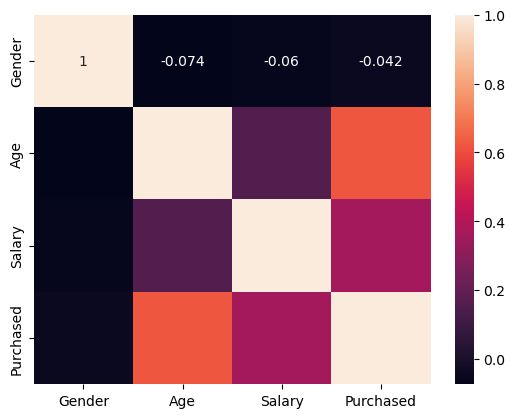

In [30]:
 sns.heatmap(df.corr(),annot=True)
 plt.show()

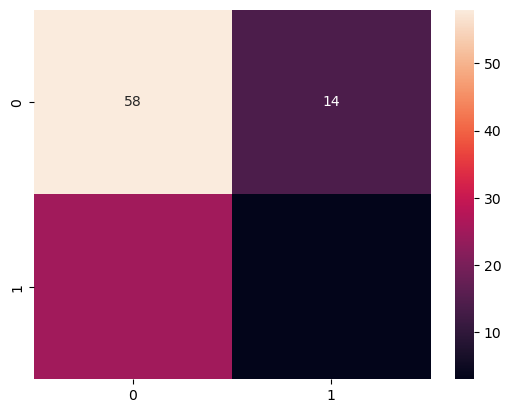

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        72
           1       0.18      0.11      0.13        28

    accuracy                           0.61       100
   macro avg       0.44      0.46      0.44       100
weighted avg       0.55      0.61      0.58       100



In [32]:
X = df[['Age','Salary']]
Y = df['Purchased']
BuildModel(X, Y)

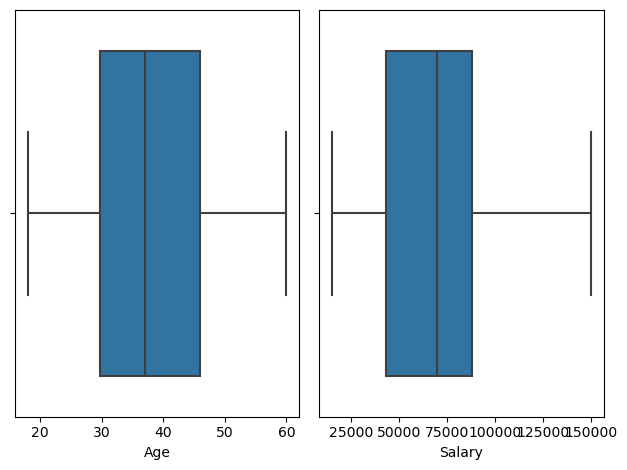

In [33]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='Age', ax=axes[0])
sns.boxplot(data = df, x ='Salary', ax=axes[1])
fig.tight_layout()
plt.show()

In [34]:
 df = RemoveOutlier(df, 'Age')
 df = RemoveOutlier(df, 'Salary')

Highest allowed in variable: Age 70.375
lowest allowed in variable: Age 5.375
Total outliers in: Age : 0
Highest allowed in variable: Salary 155500.0
lowest allowed in variable: Salary -24500.0
Total outliers in: Salary : 0
